# Breast Cancer Wisconsin (Diagnostic)

Analisando o conjunto de dados "Breast Cancer Wisconsin" para entender o comportamento das características extraídas dos exames de diagnóstico de câncer de mama em relação ao diagnóstico, indicando se o tumor é malígno ou benigno.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Definindo o caminho do arquivo CSV
caminho_arquivo = 'breast_cancer.csv'
# Verificando se o arquivo existe
if not os.path.exists(caminho_arquivo):
    print(f"Arquivo {caminho_arquivo} não encontrado.")
else:
    # Lendo o arquivo CSV
    try:
        df = pd.read_csv(caminho_arquivo)
        print("Arquivo lido com sucesso!")

    except Exception as e:
        print(f"Ocorreu um erro ao ler o arquivo: {e}")

Arquivo lido com sucesso!


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              569 non-null    int64  
 1   mean_concave_points     569 non-null    float64
 2   mean_perimeter          569 non-null    float64
 3   mean_fractal_dimension  569 non-null    float64
 4   worst_perimeter         569 non-null    float64
 5   worst_texture           569 non-null    float64
 6   worst_area              569 non-null    float64
 7   target                  569 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 35.7 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,569.0,284.000000,164.400426,0.00000,142.00000,284.00000,426.00000,568.00000
mean_concave_points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
mean_perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
mean_fractal_dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744
worst_perimeter,569.0,107.261213,33.602542,50.41000,84.11000,97.66000,125.40000,251.20000
worst_texture,569.0,25.677223,6.146258,12.02000,21.08000,25.41000,29.72000,49.54000
worst_area,569.0,880.583128,569.356993,185.20000,515.30000,686.50000,1084.00000,4254.00000
target,569.0,0.627417,0.483918,0.00000,0.00000,1.00000,1.00000,1.00000


In [5]:
# Após uma análise inicial do DataFrame, vamos remover a coluna 'Unnamed: 0' que não é necessária

df = df.drop(columns=['Unnamed: 0'])
# Verificando se a coluna foi removida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean_concave_points     569 non-null    float64
 1   mean_perimeter          569 non-null    float64
 2   mean_fractal_dimension  569 non-null    float64
 3   worst_perimeter         569 non-null    float64
 4   worst_texture           569 non-null    float64
 5   worst_area              569 non-null    float64
 6   target                  569 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 31.2 KB


## Exercício 1 - Análise Exploratória

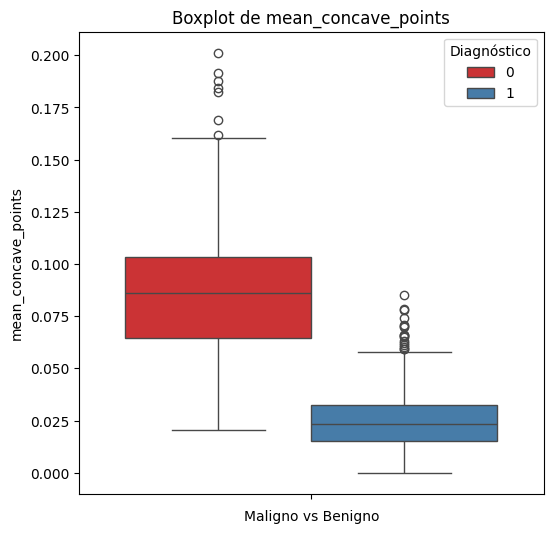

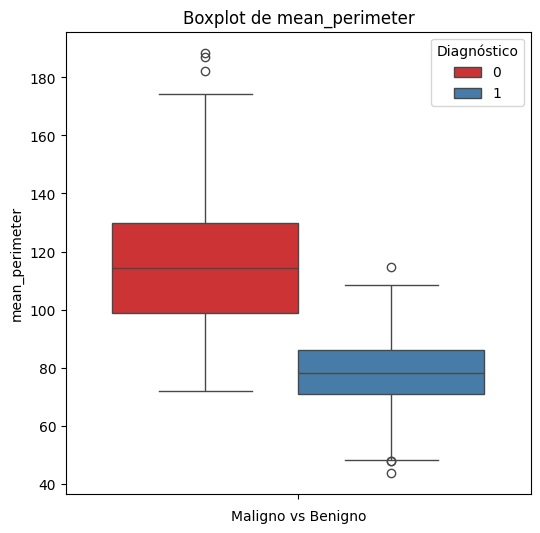

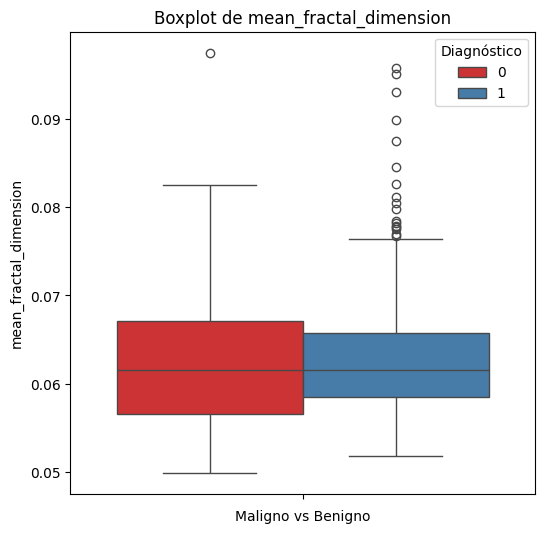

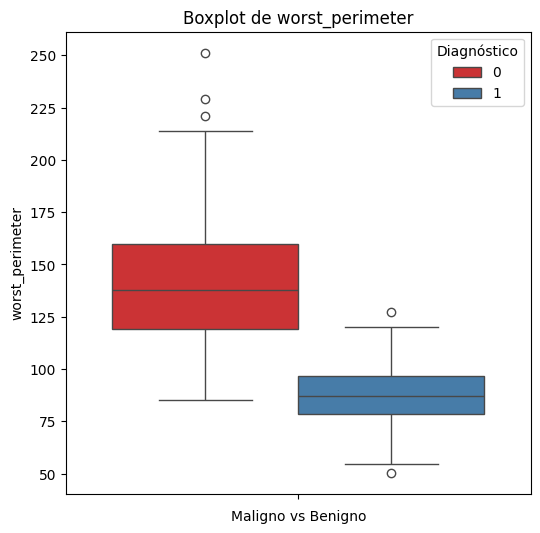

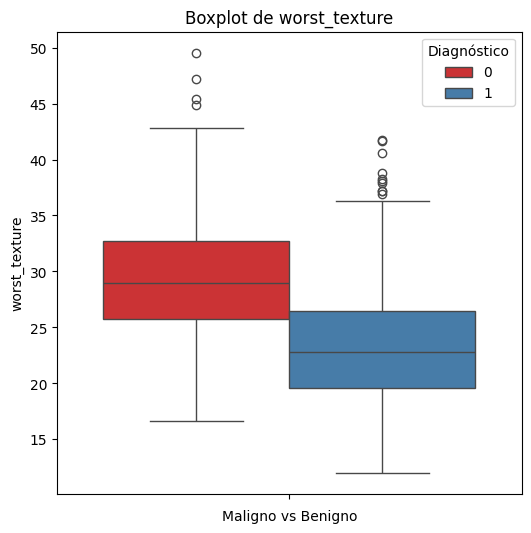

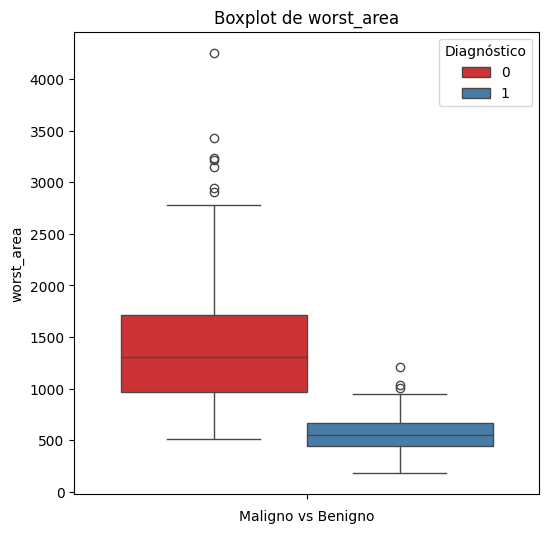

In [19]:
for variaveis in df.columns[:-1]:
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df, y=variaveis, hue='target', palette='Set1')
    plt.title(f'Boxplot de {variaveis}')
    plt.xlabel('Maligno vs Benigno')
    plt.legend(title='Diagnóstico', loc='upper right')
    plt.show()

Analisando os resultados plotados usando Boxplot, nós podemos observar que as variáveis `mean_concave_points, worst_perimeter, mean_perimeter e worst_area`, parecem ser mais descriminantes a respeito da variável target. No boxplot dessas features, nós praticamente não vemos sobreposição de caixas, o que indica que, pelo menos 50% dos dados (IQR = Q1-Q3), estão centrados ao redor de valores distintos dependendo do valor do target. Essa análise nos permite afirmar que tumores considerados malignos possuem uma tendência de ter área, perímetro e pontos côncavos maiores.

Por outro lado, a variável `mean_fractal_dimension`, apresenta uma distribuição do IQR muito parecida entre os targets, ou seja, tanto os tumores considerados benignos quanto os malignos possuem valores parecidos de `mean_fractal_dimension`, não sendo possível distinguí-los com base nessa feature.

c:\Users\enzof\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


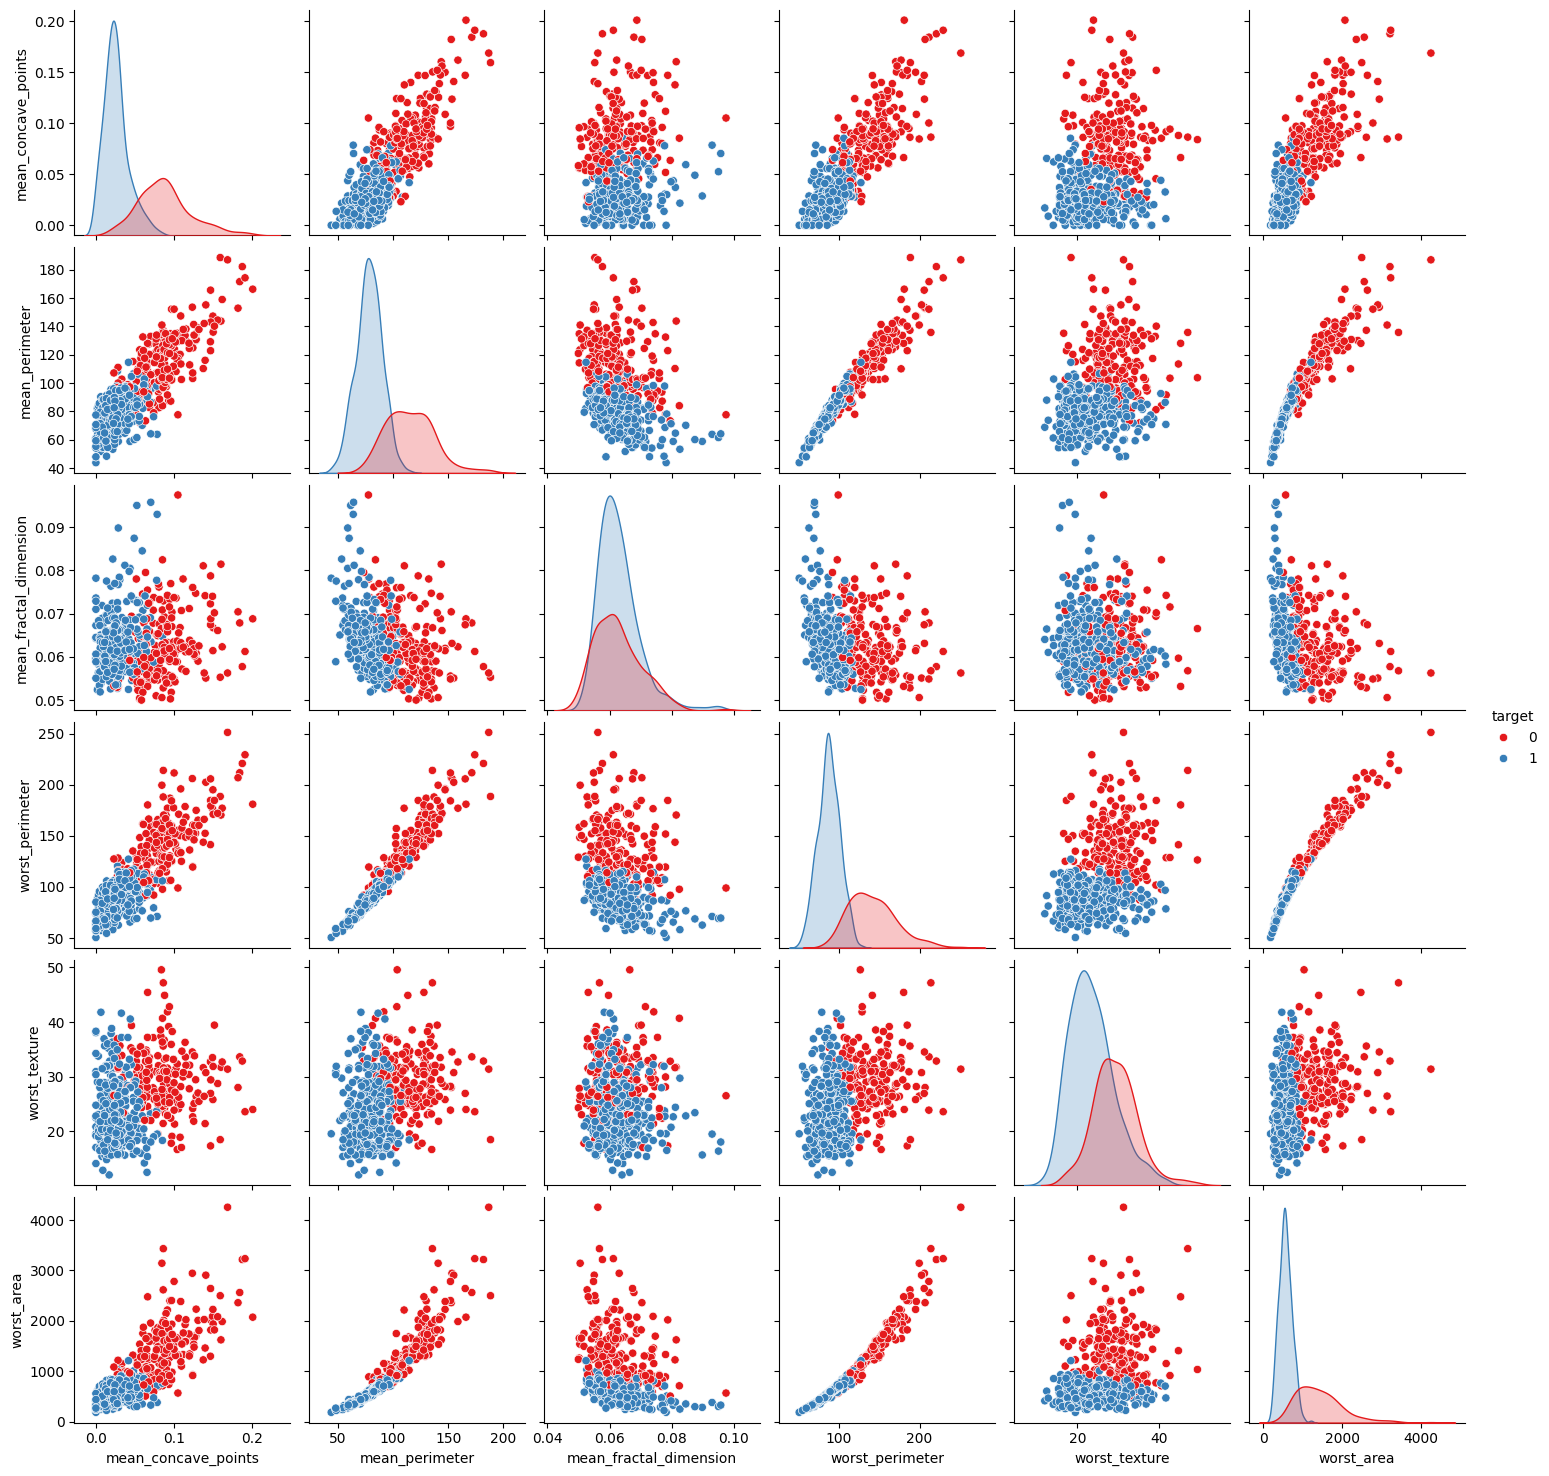

In [20]:
sns.pairplot(df, hue='target', palette='Set1')

Através do paiplot nós conseguimos confirmar algumas observarções feitas através dos boxplot, através das distribuições marginais (Diagonal Principal) confirmamos que as features `mean_concave_points`,`mean_perimeter`, `worst_perimeter` e `worst_area` parecem fazer um trabalho discrimantório melhor que as demais, podemos observar isso pela diferença entre os picos vermlhos e azuis (não estão sobrepostos) e também pela concentração dos picos, principalmente dos dados benignos (azuis).

Através da análise das relações bivariadas (entre variáveis distintas), podemos perceber uma relação linerar entre alguns pares de features, como `mean_perimeter` x `worst_perimeter` ou `worst_area` x `worst_perimeter`, essa relação linear indica alta correlação entre essas features, o que pode indicar que, de modo geral, essa variáveis carregam o mesmo "valor". Analisando a natureza dessas features, podemos observar que todas medem de certa forma o tamanho do tumor e, aparentemente, quanto maior o tumor, maiores as chances dele ser considerado maligno.

Text(0.5, 1.0, 'Mapa de Calor das Correlações')

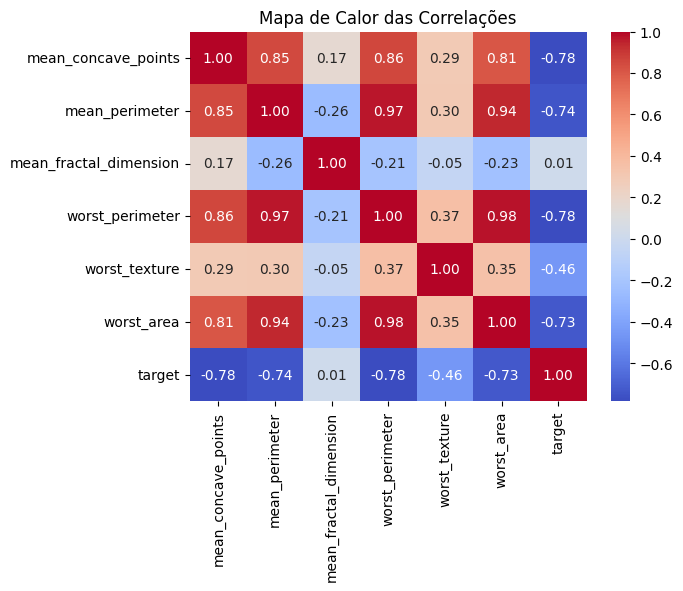

In [14]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações')

Como observamos nos plots anteriores, a nossa análise de alta correlação entre as features que indicam o tamanho do tumor se provou verdadeira, além disso, também podemos observar que `mean_concave_points` possui uma alta correlação com as outras features que indicam tamanho, evidenciando que tumores com mais pontos côncavos tendem a ser maiores. 

Olhando apenas para a nossa variável target, as variáveis com maior correlação são:
- mean_concave_points -> -0.78
- mean_perimeter -> -0.74
- worst_perimeter -> -0.78
- worst_area -> -0.73

## Exercício 2 - regressão Linear

In [ ]:
import statsmodels.api as sm

X = df.drop(columns=['target']).copy()
y = df['target'].copy()
X = sm.add_constant(X)  # Adicionando uma constante para o modelo, se não ele considera B0 como 0
model = sm.OLS(y, X).fit()